# Sato-Tate-Distributions

In the following, we take a closer look at the horizontal Sato-Tate-Distribution.
Fix an elliptic curve $E$. Then compute $a_p(E)$ for all $2 \leq p \leq C$ for an upper bound $C$ and normalize these values, i.e. take $\frac{a_p}{2\sqrt{p}}$.
Due to the Hasse-Weil-bound we have $-1 < \frac{a_p}{2\sqrt{p}} < 1$ for all of these values.
As a result, we can view this as a probability distribution:

num_bins: 50


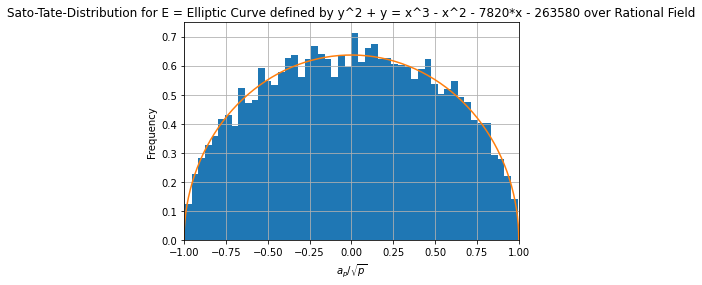

In [1]:
import sage_src.horizontal_st as horizontal_st
E0 = EllipticCurve([0, -1, 1, -7820, -263580])
S0 = horizontal_st.SatoTate(E0)
S0.histogram(100000, 50)

It is proven that for $\lim\limits_{C \to \infty}$ this distribution converges to a semicircle (orange).

In the following, we investigate the speed of convergence.
We define $\Delta$ to be the L2-difference of the vertical Distribution and the semicircle.
It ist computed with the function 
```python
Delta(C, a, b, max_points=300):
```
that depends on the bound $C$ up to which the $a_p$-values are computed and an interval $(a,b)$.  
```max_points``` tells the number of points used for the numerical integration.

We now ask the question how $\Delta$ evolves over time. As $\Delta$ decreases very fast, it is easier to plot $\theta = -\log_C(\Delta(C)^2)$.


### Conjecture (Akiyama-Tanigawa 1999)
For all $\epsilon > 0$ there exists a $C$ s.t.

$$\Delta(C)_\infty \leq \frac{1}{\pi(C)^{1/2-\epsilon}}$$

where $\Delta(C)_\infty$ is defined completely analogous with the $L_\infty$-norm instead of the $L_2$-norm and $\pi(C)$ is the number of primes lower than $C$.

This conjecture implies the Generalized Riemann Hypothesis for $L(E,s)$, see e.g. this Senior thesis by Chris Swierczewski: https://wstein.org/projects/swierczewski.pdf

Mazur and Stein argue in https://wstein.org/talks/20071016-convergence/akiyama-tanigawa.txt
that their conjecture (which we are investigating) implies the conjecture of Akiyama and Tanigawa.

### Conjecture (Stein, Mazur)
There exists a number $e$ with $\frac{1}{2} \leq e \leq 1$ such
that $$\Delta(C)^2 \leq \frac{1}{C^e}$$
for all but finitely many C, or equivalently
$$\theta(C) = -\log_C \Delta(C)^2 \geq e.$$

As visible in the next plot, for curve $E_0$ one might choose $e = 1$.

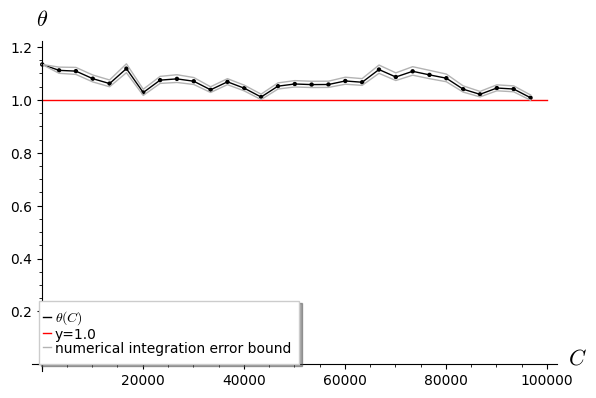

In [4]:
N = 100000; pp=30
S0.plot_theta(N,plot_points=pp, max_points=300)

As visible in the following, $e$ strongly depends on the rank

In [5]:
E1 = EllipticCurve([0, 0, 1, -1, 0]) # rank 1
E2 = EllipticCurve([0, 1, 1, -2, 0]) # rank 2
E3 = EllipticCurve([0, 0, 1, -7, 6]) # rank 3
E4 = EllipticCurve([1, -1, 0, -79, 289]) # rank 4
E5 = EllipticCurve([0, 0, 1, -79, 342]) # rank 5
#Elkies rank >= 28 curve:
Eelkie = EllipticCurve([1,-1,1,-20067762415575526585033208209338542750930230312178956502,34481611795030556467032985690390720374855944359319180361266008296291939448732243429])

S1 = horizontal_st.SatoTate(E1)
S2 = horizontal_st.SatoTate(E2)
S3 = horizontal_st.SatoTate(E3)
S4 = horizontal_st.SatoTate(E4)
S5 = horizontal_st.SatoTate(E5)
Selkie = horizontal_st.SatoTate(Eelkie)

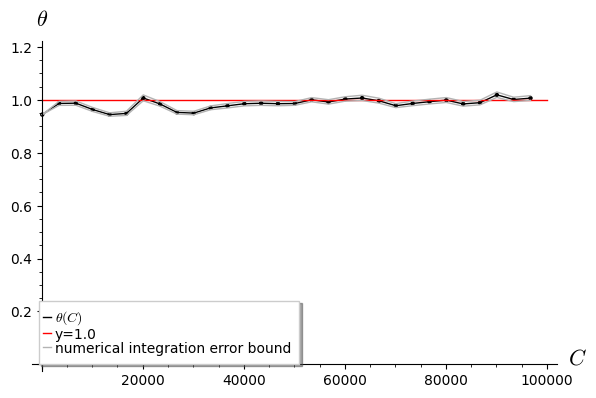

In [6]:
S1.plot_theta(N,plot_points=pp, max_points=300)

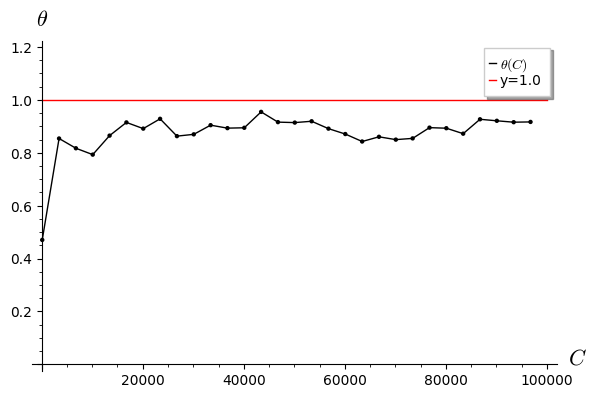

In [8]:
S2.plot_theta(N,plot_points=pp, show_error_bound=False)

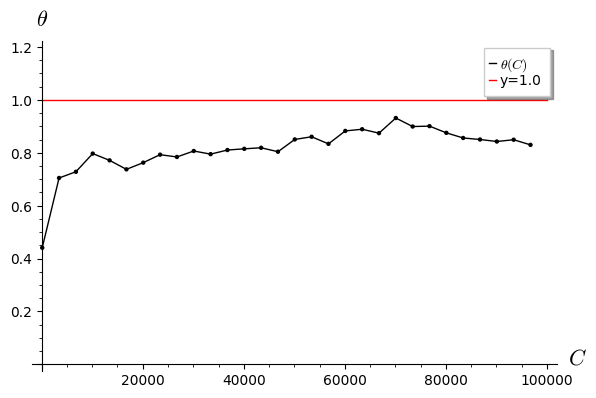

In [10]:
S3.plot_theta(N,plot_points=pp, show_error_bound=False)

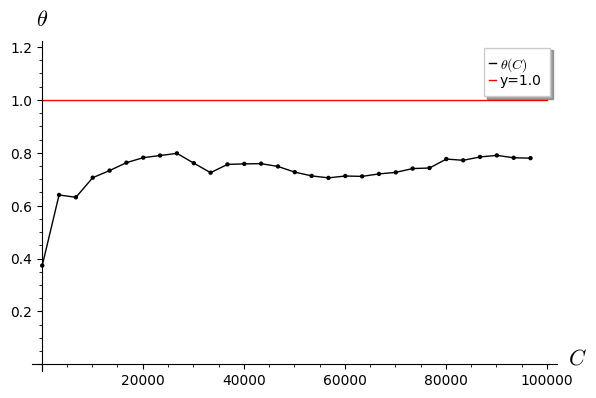

In [12]:
S4.plot_theta(N,plot_points=pp, show_error_bound=False)

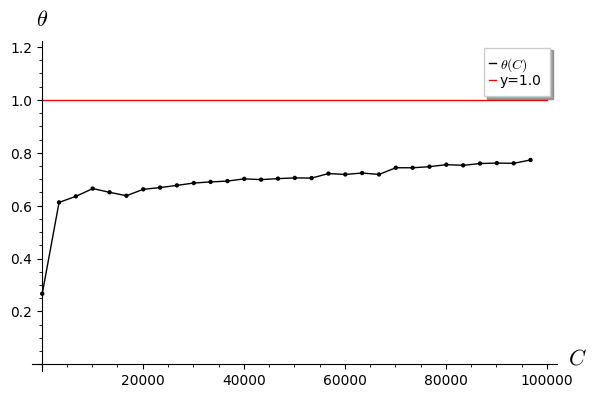

In [14]:
S5.plot_theta(N,plot_points=pp, show_error_bound=False)

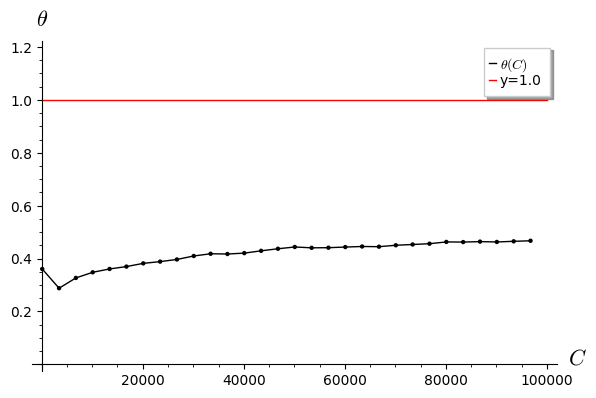

In [16]:
Selkie.plot_theta(N, plot_points=pp, show_error_bound=False)

Considering curves of different conductor, one cannot really find a correlation:

In [17]:
E01 = EllipticCurve([1, 0, 1, -2731, -55146]) #conductor = 2*7, https://www.lmfdb.org/EllipticCurve/Q/14/a/1
E02 = EllipticCurve([1, 1, 1, -2160, -39540]) #conductor = 3*5, https://www.lmfdb.org/EllipticCurve/Q/15/a/1
E03 = EllipticCurve([1, -1, 1, -91, -310]) #conductor = 17, https://www.lmfdb.org/EllipticCurve/Q/17/a/1
E04 = EllipticCurve([0, 1, 1, -769, -8470]) #conductor = 19, https://www.lmfdb.org/EllipticCurve/Q/19/a/1
E05 = EllipticCurve([1, 1, 1, -337, -2522]) #conductor = 16193, https://www.lmfdb.org/EllipticCurve/Q/16193/a/1

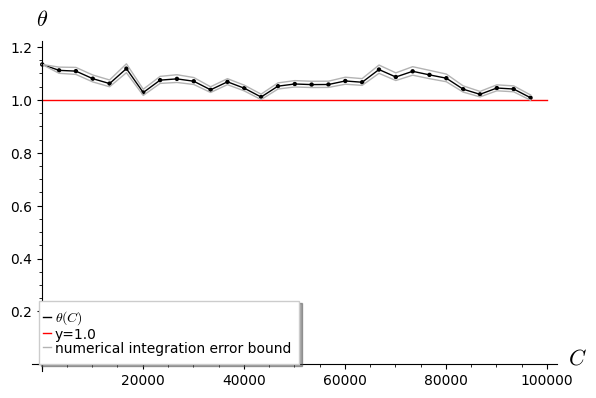

In [18]:
S01 = horizontal_st.SatoTate(E01)
S02 = horizontal_st.SatoTate(E02)
S03 = horizontal_st.SatoTate(E03)
S04 = horizontal_st.SatoTate(E04)
S05 = horizontal_st.SatoTate(E05)

S0.plot_theta(N,plot_points=pp)

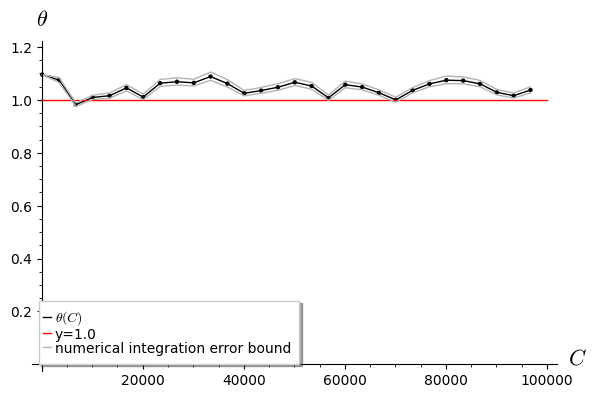

In [19]:
S01.plot_theta(N,plot_points=pp)

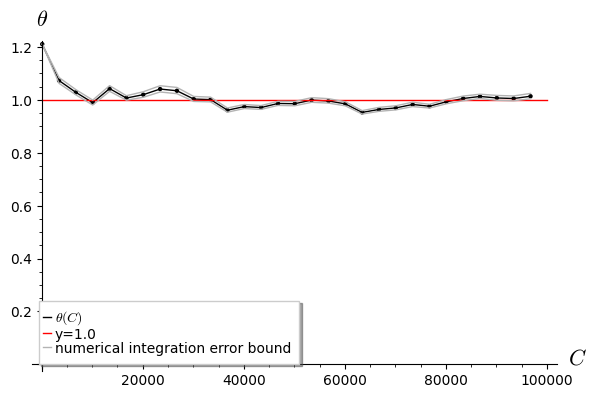

In [20]:
S02.plot_theta(N,plot_points=pp)

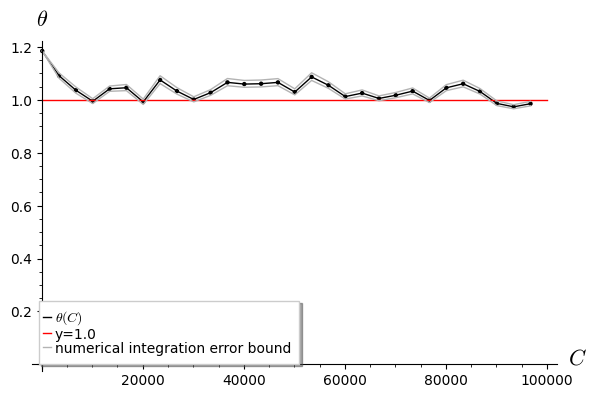

In [21]:
S03.plot_theta(N,plot_points=pp)

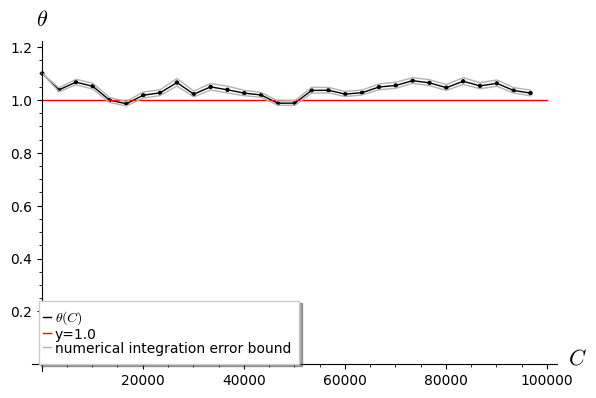

In [22]:
S04.plot_theta(N,plot_points=pp)

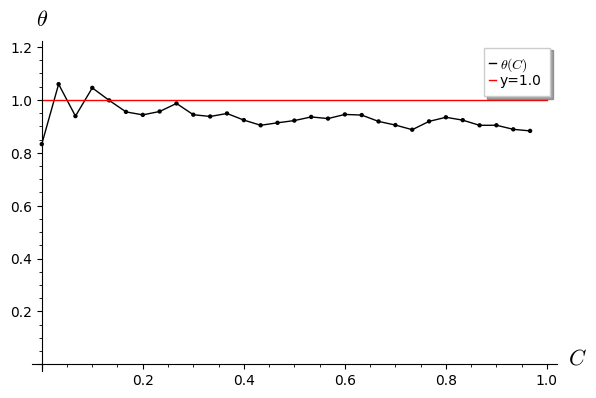

In [24]:
S05.plot_theta(10*N,plot_points=pp, show_error_bound=False)

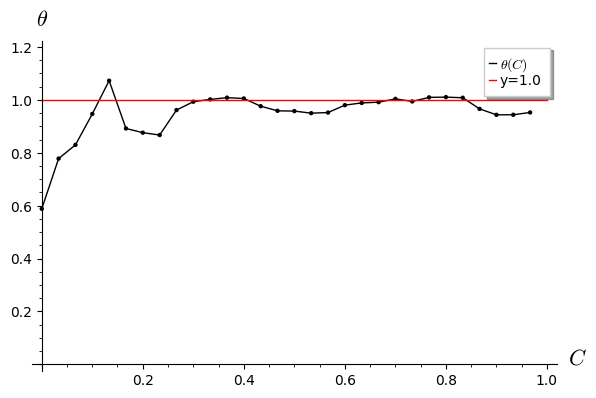

In [26]:
S05.plot_theta(10*N, plot_points=pp, a=-.1,b=.1, show_error_bound=False)

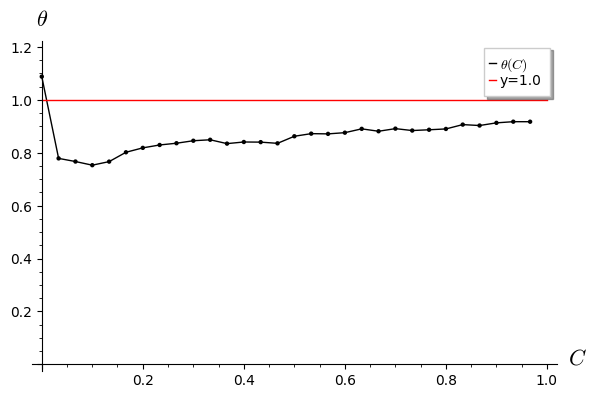

In [28]:
S05.plot_theta(10*N, plot_points=pp, a=-.01,b=.01, show_error_bound=False)

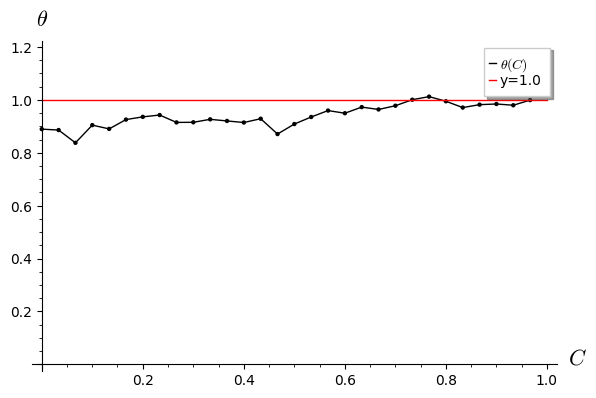

In [30]:
horizontal_st.SatoTate(EllipticCurve([0, 0, 1, -10, 4])).plot_theta(10*N, plot_points=pp, a=-.1, b=.1, show_error_bound=False)